In [1]:
import numpy as np
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '1'
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
left_click_data  = np.load('dataset/seq_left_click_1646722489.npy')
right_click_data = np.load('dataset/seq_right_click_1646722489.npy')
Move_data        = np.load('dataset/seq_Move_1646722489.npy')
None_data        = np.load('dataset/seq_None_1646722489.npy')

print(f'{left_click_data.shape} /n {right_click_data.shape} /n {Move_data.shape} /n {None_data.shape}')

right_click_data = np.delete(right_click_data, [872], axis=0) 
Move_data       = np.delete(Move_data , [873,872], axis=0) 
None_data       = np.delete(None_data , [872], axis=0) 

print(f'{left_click_data.shape} /n {right_click_data.shape} /n {Move_data.shape} /n {None_data.shape}')


(872, 30, 100) /n (873, 30, 100) /n (874, 30, 100) /n (873, 30, 100)
(872, 30, 100) /n (872, 30, 100) /n (872, 30, 100) /n (872, 30, 100)


In [5]:
actions = ['left_click', 'right_click', 'Move', 'None']

data = np.concatenate([
    left_click_data,
    right_click_data,
    Move_data,
    None_data
], axis=0)

data.shape

(3488, 30, 100)

In [6]:
x_data = data[:, :, :-1]
labels = data[:, 0, -1]

print(x_data.shape)
print(labels.shape)

(3488, 30, 99)
(3488,)


In [7]:
from tensorflow.keras.utils import to_categorical

y_data = to_categorical(labels, num_classes=len(actions))
y_data.shape

(3488, 4)

In [18]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=2022)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(2441, 30, 99) (2441, 4)
(1047, 30, 99) (1047, 4)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    LSTM(64, activation='relu', input_shape=x_train.shape[1:3]),
    Dense(32, activation='relu'),
    Dense(len(actions), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                41984     
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 44,196
Trainable params: 44,196
Non-trainable params: 0
_________________________________________________________________


In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=200,
    callbacks=[
        ModelCheckpoint('models/model.h5', monitor='val_acc', verbose=1, save_best_only=True, mode='auto'),
        ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=50, verbose=1, mode='auto')
    ]
)

Epoch 1/200
73/77 [===========================>..] - ETA: 0s - loss: 13.0106 - acc: 0.5312
Epoch 00001: val_acc improved from -inf to 0.78415, saving model to models\model.h5
77/77 [==============================] - 1s 10ms/step - loss: 12.5332 - acc: 0.5408 - val_loss: 1.4435 - val_acc: 0.7841 - lr: 0.0010
Epoch 2/200
77/77 [==============================] - ETA: 0s - loss: 0.8875 - acc: 0.8247
Epoch 00002: val_acc improved from 0.78415 to 0.87775, saving model to models\model.h5
77/77 [==============================] - 1s 8ms/step - loss: 0.8875 - acc: 0.8247 - val_loss: 0.5280 - val_acc: 0.8777 - lr: 0.0010
Epoch 3/200
73/77 [===========================>..] - ETA: 0s - loss: 5.1257 - acc: 0.7988
Epoch 00003: val_acc did not improve from 0.87775
77/77 [==============================] - 1s 8ms/step - loss: 5.0905 - acc: 0.7927 - val_loss: 4.6543 - val_acc: 0.5291 - lr: 0.0010
Epoch 4/200
72/77 [===========================>..] - ETA: 0s - loss: 1.8269 - acc: 0.8325
Epoch 00004: val_acc

Epoch 30/200
71/77 [==========================>...] - ETA: 0s - loss: 0.0116 - acc: 0.9969
Epoch 00030: val_acc did not improve from 0.99904
77/77 [==============================] - 1s 8ms/step - loss: 0.0112 - acc: 0.9971 - val_loss: 0.0211 - val_acc: 0.9952 - lr: 0.0010
Epoch 31/200
72/77 [===========================>..] - ETA: 0s - loss: 0.0033 - acc: 0.9996
Epoch 00031: val_acc did not improve from 0.99904
77/77 [==============================] - 1s 8ms/step - loss: 0.0034 - acc: 0.9992 - val_loss: 0.0172 - val_acc: 0.9962 - lr: 0.0010
Epoch 32/200
72/77 [===========================>..] - ETA: 0s - loss: 0.0020 - acc: 1.0000
Epoch 00032: val_acc did not improve from 0.99904
77/77 [==============================] - 1s 8ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0135 - val_acc: 0.9990 - lr: 0.0010
Epoch 33/200
70/77 [==========================>...] - ETA: 0s - loss: 0.0132 - acc: 0.9987
Epoch 00033: val_acc did not improve from 0.99904
77/77 [==============================] -

72/77 [===========================>..] - ETA: 0s - loss: 8.2894e-05 - acc: 1.0000
Epoch 00059: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 8.8643e-05 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9990 - lr: 0.0010
Epoch 60/200
71/77 [==========================>...] - ETA: 0s - loss: 8.7362e-05 - acc: 1.0000
Epoch 00060: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 8.5205e-05 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9990 - lr: 0.0010
Epoch 61/200
73/77 [===========================>..] - ETA: 0s - loss: 7.9377e-05 - acc: 1.0000
Epoch 00061: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 7.6927e-05 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.9990 - lr: 0.0010
Epoch 62/200
72/77 [===========================>..] - ETA: 0s - loss: 3.4502e-04 - acc: 1.0000
Epoch 00062: val_acc did not improve from 1.00000
77/77 [==================

71/77 [==========================>...] - ETA: 0s - loss: 4.1564e-05 - acc: 1.0000
Epoch 00088: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 4.0959e-05 - acc: 1.0000 - val_loss: 1.8097e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 89/200
73/77 [===========================>..] - ETA: 0s - loss: 3.7614e-05 - acc: 1.0000
Epoch 00089: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 3.7676e-05 - acc: 1.0000 - val_loss: 1.8080e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 90/200
71/77 [==========================>...] - ETA: 0s - loss: 3.4044e-05 - acc: 1.0000
Epoch 00090: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 3.4893e-05 - acc: 1.0000 - val_loss: 1.6732e-04 - val_acc: 1.0000 - lr: 0.0010
Epoch 91/200
72/77 [===========================>..] - ETA: 0s - loss: 3.3575e-05 - acc: 1.0000
Epoch 00091: val_acc did not improve from 1.00000
77/77 [======

71/77 [==========================>...] - ETA: 0s - loss: 1.2453e-05 - acc: 1.0000
Epoch 00116: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 1.3038e-05 - acc: 1.0000 - val_loss: 1.6153e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 117/200
77/77 [==============================] - ETA: 0s - loss: 1.2625e-05 - acc: 1.0000
Epoch 00117: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 1.2625e-05 - acc: 1.0000 - val_loss: 1.5740e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 118/200
73/77 [===========================>..] - ETA: 0s - loss: 1.2437e-05 - acc: 1.0000
Epoch 00118: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 1.2232e-05 - acc: 1.0000 - val_loss: 1.5659e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 119/200
71/77 [==========================>...] - ETA: 0s - loss: 1.1721e-05 - acc: 1.0000
Epoch 00119: val_acc did not improve from 1.0000

72/77 [===========================>..] - ETA: 0s - loss: 4.9913e-06 - acc: 1.0000
Epoch 00144: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 5.1771e-06 - acc: 1.0000 - val_loss: 1.2275e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 145/200
71/77 [==========================>...] - ETA: 0s - loss: 4.7485e-06 - acc: 1.0000
Epoch 00145: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 4.9233e-06 - acc: 1.0000 - val_loss: 1.1786e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 146/200
72/77 [===========================>..] - ETA: 0s - loss: 4.8288e-06 - acc: 1.0000
Epoch 00146: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 4.7302e-06 - acc: 1.0000 - val_loss: 1.1532e-04 - val_acc: 1.0000 - lr: 5.0000e-04
Epoch 147/200
71/77 [==========================>...] - ETA: 0s - loss: 4.6665e-06 - acc: 1.0000
Epoch 00147: val_acc did not improve from 1.0000

76/77 [============================>.] - ETA: 0s - loss: 2.4771e-06 - acc: 1.0000
Epoch 00172: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 2.4680e-06 - acc: 1.0000 - val_loss: 6.6338e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 173/200
70/77 [==========================>...] - ETA: 0s - loss: 2.3942e-06 - acc: 1.0000
Epoch 00173: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 2.3925e-06 - acc: 1.0000 - val_loss: 6.4397e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 174/200
72/77 [===========================>..] - ETA: 0s - loss: 2.3611e-06 - acc: 1.0000
Epoch 00174: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 2.3212e-06 - acc: 1.0000 - val_loss: 6.3137e-05 - val_acc: 1.0000 - lr: 2.5000e-04
Epoch 175/200
71/77 [==========================>...] - ETA: 0s - loss: 2.2466e-06 - acc: 1.0000
Epoch 00175: val_acc did not improve from 1.0000

71/77 [==========================>...] - ETA: 0s - loss: 8.1263e-07 - acc: 1.0000
Epoch 00200: val_acc did not improve from 1.00000
77/77 [==============================] - 1s 8ms/step - loss: 8.6429e-07 - acc: 1.0000 - val_loss: 3.1119e-05 - val_acc: 1.0000 - lr: 1.2500e-04


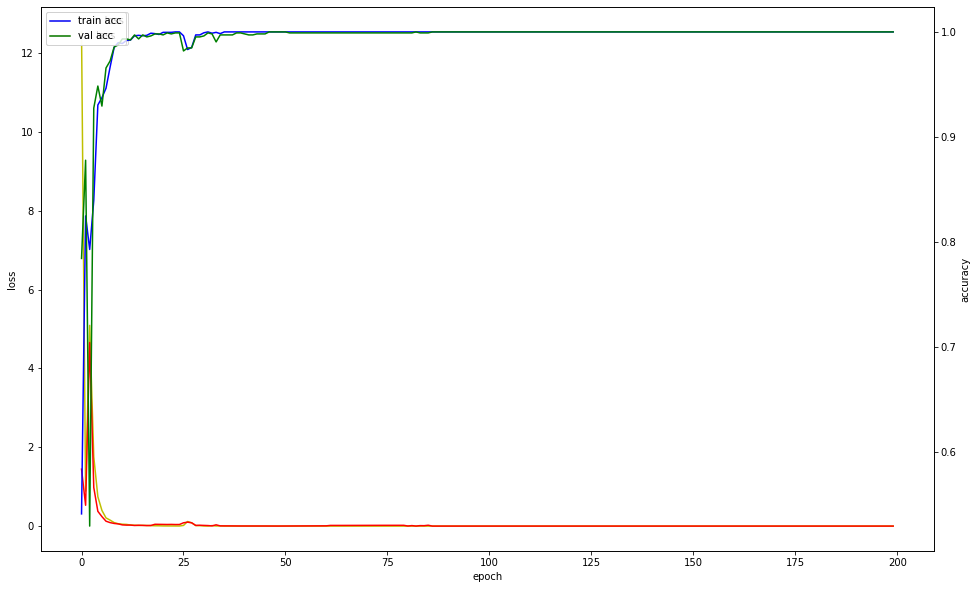

In [21]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots(figsize=(16, 10))
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['acc'], 'b', label='train acc')
acc_ax.plot(history.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [22]:
from sklearn.metrics import multilabel_confusion_matrix
from tensorflow.keras.models import load_model

model = load_model('models/model.h5')

y_pred = model.predict(x_val)

multilabel_confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))

array([[[791,   0],
        [  0, 256]],

       [[771,   0],
        [  0, 276]],

       [[784,   0],
        [  0, 263]],

       [[795,   0],
        [  0, 252]]], dtype=int64)